## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [75]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# setting up styles for visualizations
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Read Data

In [76]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [77]:
df = pd.read_csv("[Template] students_adaptability_level_online_education.csv")


### Generate Data Profiling Report

In [78]:
# Viewing the first 6 rows
df.head(6)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low


In [79]:
# Viewing number of rows and columns
print(f"The number of rows are: {df.shape[0]} and columns are: {df.shape[1]}")


The number of rows are: 1205 and columns are: 14


In [80]:
# check columns/variable
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [81]:
# Viewing data types of columns
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [82]:
# Viewing statistical description of catagorical columns 
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [83]:
# Viewing infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [84]:
# Viewing missing values in the whole dataset and missing values in each column
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [85]:
# Identify sum of duplicate rows
df.duplicated().sum()


949

In [86]:
for column in df:
    print( "column name:", column, "- unique values ",df[column].unique())
    print("------------------------------------------------------------------")

column name: Gender - unique values  ['Boy' 'Girl']
------------------------------------------------------------------
column name: Age - unique values  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
------------------------------------------------------------------
column name: Education Level - unique values  ['University' 'College' 'School']
------------------------------------------------------------------
column name: Institution Type - unique values  ['Non Government' 'Government']
------------------------------------------------------------------
column name: IT Student - unique values  ['No' 'Yes']
------------------------------------------------------------------
column name: Location - unique values  ['Yes' 'No']
------------------------------------------------------------------
column name: Load-shedding - unique values  ['Low' 'High']
------------------------------------------------------------------
column name: Financial Condition - unique values  ['Mid' 'Poor' 'Rich']
--

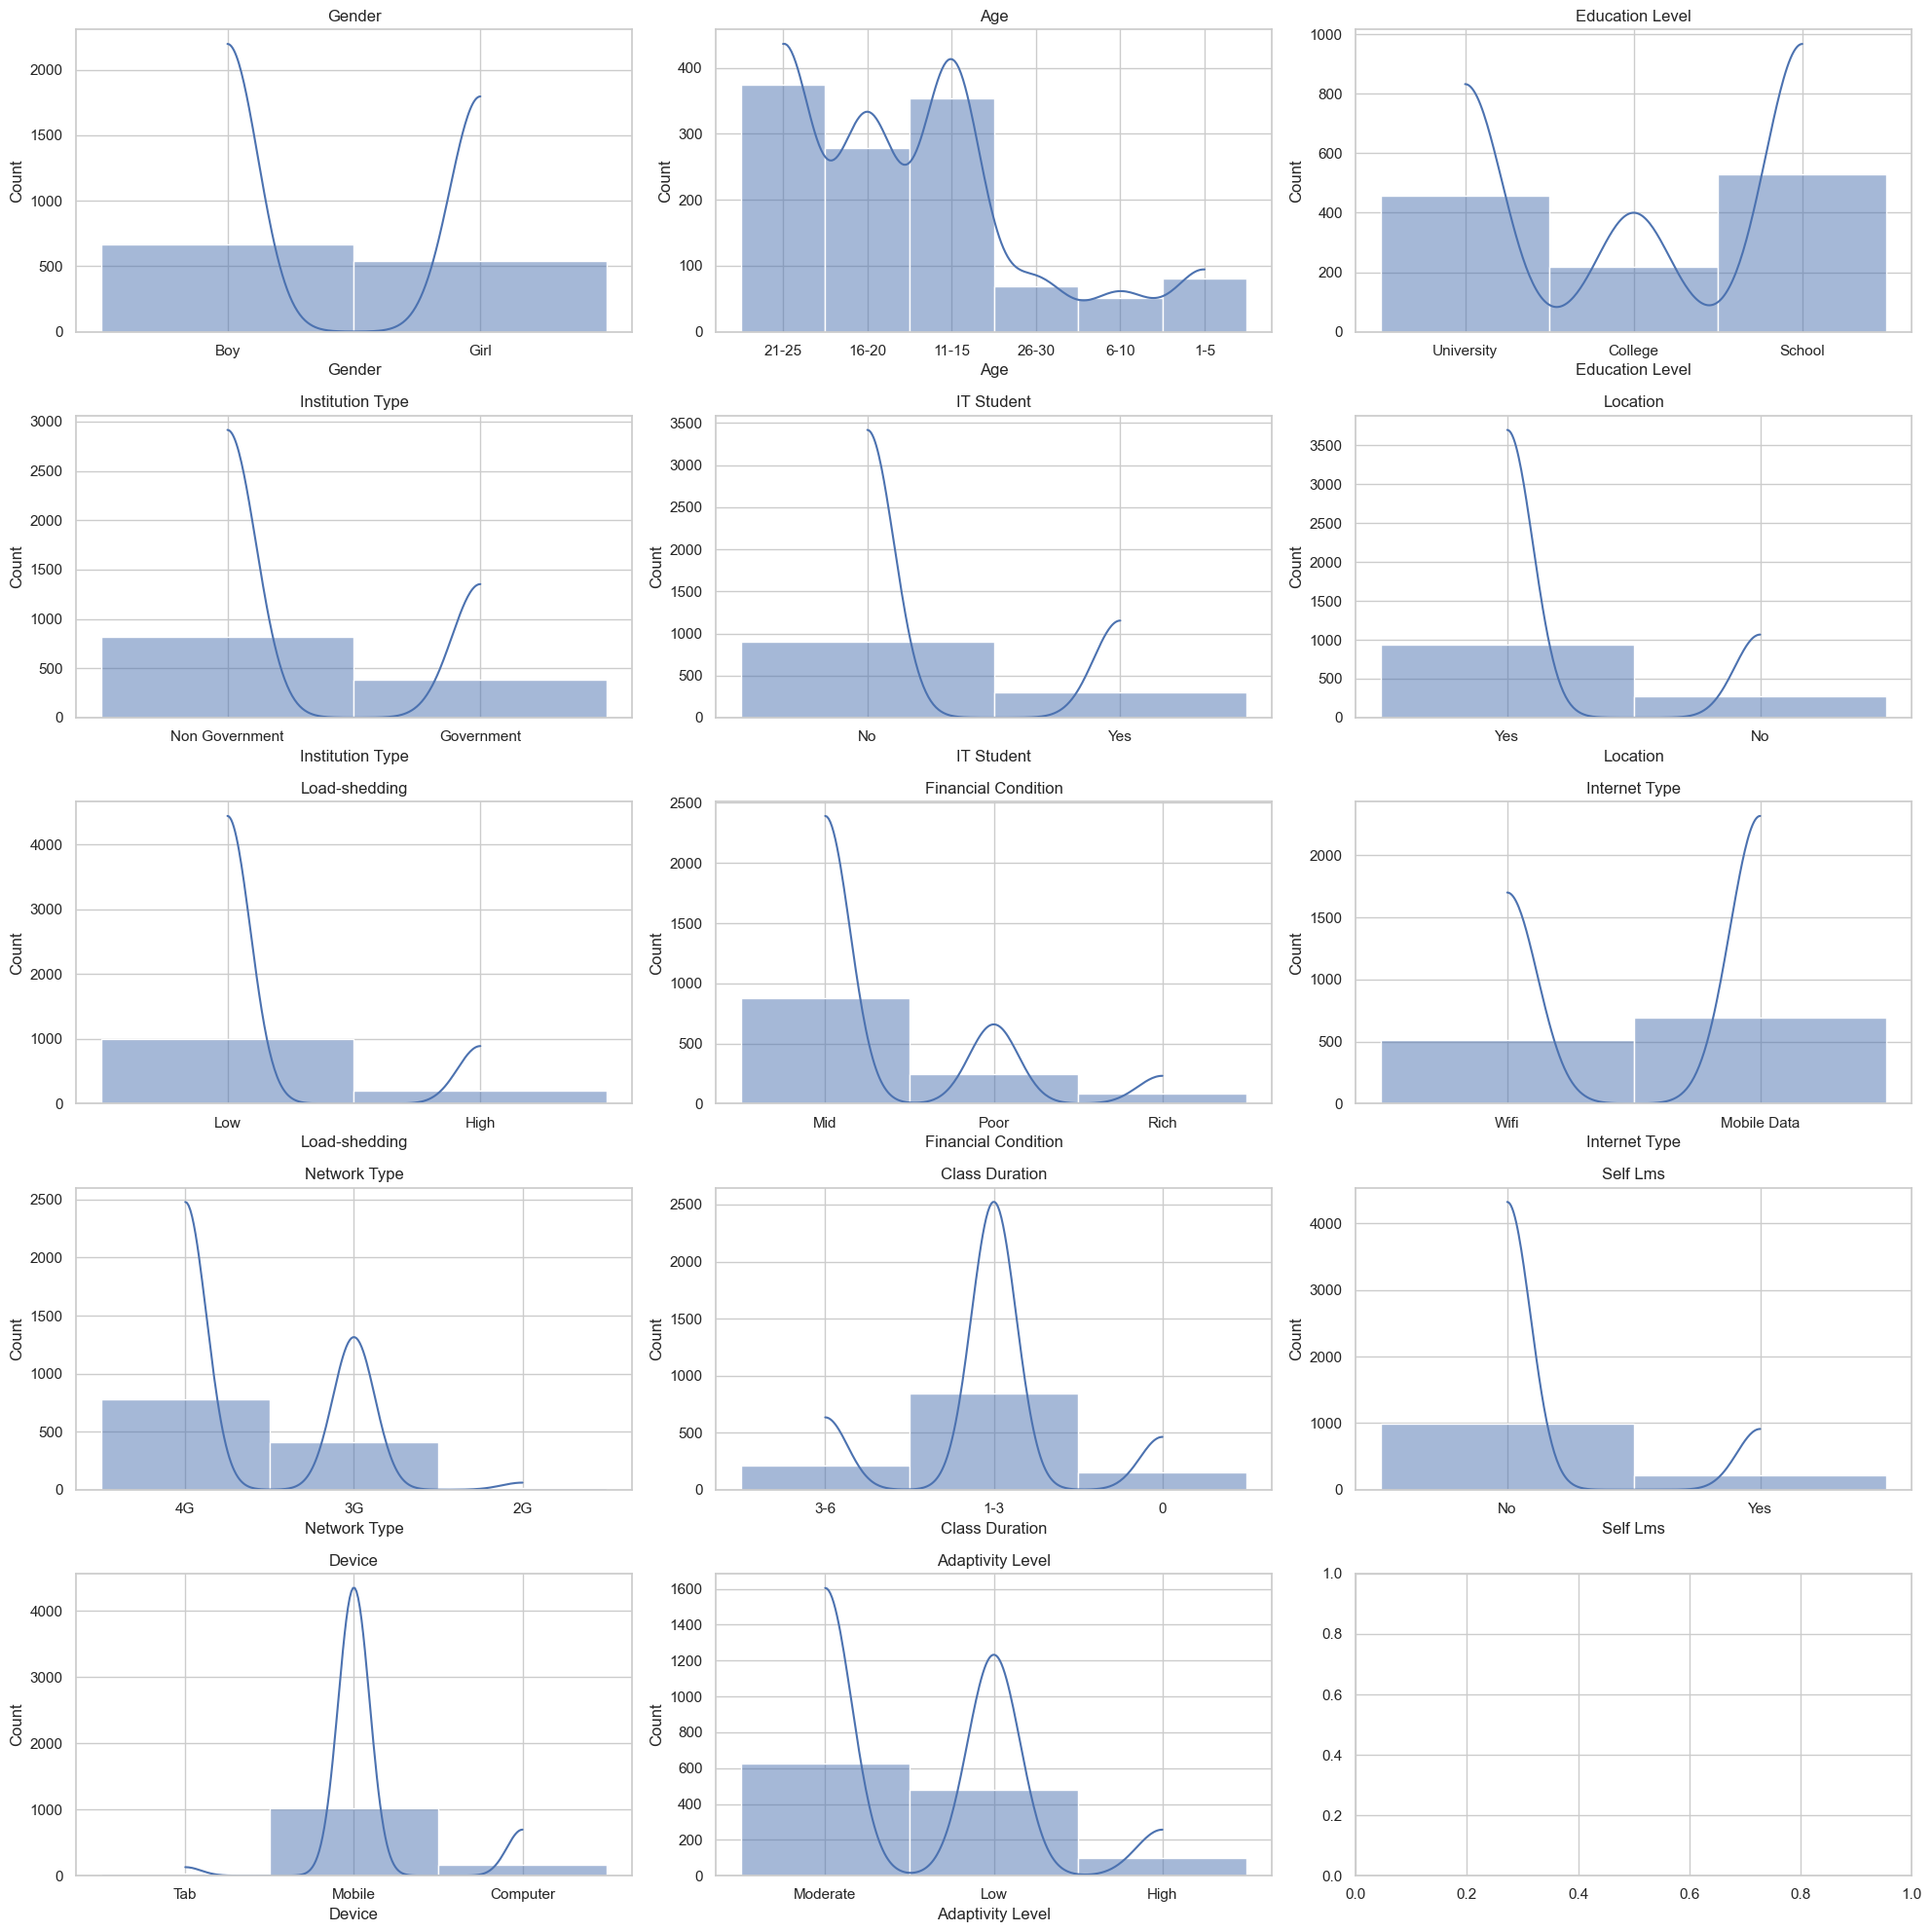

In [87]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Encoding

Choose a suitable encoding technique for the columns.

### Binary encoding

In [88]:
# Binary encoding for Gender, Institution Type, IT Student, Location, Internet Type, Self Lms

# Gender binary encoding
Gender_mapping = {'Boy': 1, 'Girl': 0}
df['Gender_B_Encoded'] = df['Gender'].map(Gender_mapping)
#df[['Gender', 'Gender_B_Encoded']].head()

# Institution Type binary encoding
Institution_Type_mapping = {'Non Government': 1, 'Government': 0}
df['InstituteType_B_Encoded'] = df['Institution Type'].map(Institution_Type_mapping)
#df[['Institution Type', 'InstituteType_B_Encoded']].head()

# IT Student binary encoding
IT_Student_mapping = {'No': 1, 'Yes': 0}
df['ItStu_B_Encoded'] = df['IT Student'].map(IT_Student_mapping)
#df[['IT Student', 'ItStu_B_Encoded']].head()

# Location binary encoding
Location_mapping = {'No': 1, 'Yes': 0}
df['Location_B_Encoded'] = df['Location'].map(Location_mapping)
#df[['Location', 'Location_B_Encoded']].head()

# Internet Type binary encoding
Internet_Type_mapping = {'Wifi': 1, 'Mobile Data': 0}
df['InternetType_B_Encoded'] = df['Internet Type'].map(Internet_Type_mapping)
#df[['Internet Type', 'InternetType_B_Encoded']].head()

# Self Lms binary encoding
Self_Lms_mapping = {'No': 1, 'Yes': 0}
df['SelfLms_B_Encoded'] = df['Self Lms'].map(Self_Lms_mapping)
#df[['Self Lms', 'SelfLms_B_Encoded']].head()

### Ordinal encoding

In [89]:
from sklearn.preprocessing import OrdinalEncoder

# Adaptivity Level ordinal encoding
Adaptivity_Level_mapping = {'Moderate': 2, 'Low': 1, 'High': 3 }
df['Adaptivity_B_Encoded'] = df['Adaptivity Level'].map(Adaptivity_Level_mapping)
#df[['Adaptivity Level', 'Adaptivity_B_Encoded']].head(30)

# Ordinal encoding of the 'Education' column
ordinal_encoder = OrdinalEncoder()

# Reshape the data since OrdinalEncoder expects 2D input
Adaptivity_reshaped = df['Adaptivity_B_Encoded'].values.reshape(-1, 1)

# Fit and transform the data
df['Adaptivity_Ordinal_Encoded'] = ordinal_encoder.fit_transform(Adaptivity_reshaped)

# Display the first few rows to show the encoded column
#df[['Adaptivity Level', 'Adaptivity_Ordinal_Encoded']].head()

# Drop the Adaptivity_B_Encoded column
df.drop('Adaptivity_B_Encoded', axis=1, inplace=True)



In [90]:
# Financial Condition ordinal encoding
Financial_Condition_mapping = {'Mid': 2, 'Poor': 1, 'Rich': 3 }
df['FinancialCon_B_Encoded'] = df['Financial Condition'].map(Financial_Condition_mapping)
#df[['Financial Condition', 'Adaptivity_B_Encoded']].head(30)

# Ordinal encoding of the 'Education' column
ordinal_encoder = OrdinalEncoder()

# Reshape the data since OrdinalEncoder expects 2D input
FinancialCon_reshaped = df['FinancialCon_B_Encoded'].values.reshape(-1, 1)

# Fit and transform the data
df['Financial_Ordinal_Encoded'] = ordinal_encoder.fit_transform(FinancialCon_reshaped)

# Display the first few rows to show the encoded column
#df[['Financial Condition', 'Financial_Ordinal_Encoded']].head()

# Drop the Adaptivity_B_Encoded column
df.drop('FinancialCon_B_Encoded', axis=1, inplace=True)


In [91]:
# Load-shedding ordinal encoding
LoadShedding_mapping = {'Low': 1, 'High': 2}
df['LoadShedding_B_Encoded'] = df['Load-shedding'].map(LoadShedding_mapping)
#df[['Load-shedding', 'LoadShedding_B_Encoded']].head(30)

# Ordinal encoding of the 'Education' column
ordinal_encoder = OrdinalEncoder()

# Reshape the data since OrdinalEncoder expects 2D input
LoadShedding_reshaped = df['LoadShedding_B_Encoded'].values.reshape(-1, 1)

# Fit and transform the data
df['LoadShedding_Ordinal_Encoded'] = ordinal_encoder.fit_transform(LoadShedding_reshaped)

# Display the first few rows to show the encoded column
#df[['Load-shedding', 'LoadShedding_Ordinal_Encoded']].head()


df.drop('LoadShedding_B_Encoded', axis=1, inplace=True)
#df.head(10)

In [92]:
# Education Level ordinal encoding
Education_Level_mapping = {'College': 2, 'School': 1, 'University': 3 }
df['EducationLvl_B_Encoded'] = df['Education Level'].map(Education_Level_mapping)
#df[['Education Level', 'EducationLvl_B_Encoded']].head(30)

# Ordinal encoding of the 'Education' column
ordinal_encoder = OrdinalEncoder()

# Reshape the data since OrdinalEncoder expects 2D input
EducationLvl_reshaped = df['EducationLvl_B_Encoded'].values.reshape(-1, 1)

# Fit and transform the data
df['EducationLvl_Ordinal_Encoded'] = ordinal_encoder.fit_transform(EducationLvl_reshaped)

# Display the first few rows to show the encoded column
#df[['Education Level', 'EducationLvl_Ordinal_Encoded']].head(20)

df.drop('EducationLvl_B_Encoded', axis=1, inplace=True)

### One hot encoding

In [93]:
# Encoding the identified categorical variables
df_encoded = pd.get_dummies(df, columns=['Age', 'Network Type', 'Class Duration', 'Device'], drop_first=True)

# Displaying the first few rows of the encoded dataframe
#df_encoded.head()



#### Droping unwanted columns

In [94]:
df_encoded.drop('Gender', axis=1, inplace=True)
df_encoded.drop('Institution Type', axis=1, inplace=True)
df_encoded.drop('IT Student', axis=1, inplace=True)
df_encoded.drop('Location', axis=1, inplace=True)
df_encoded.drop('Internet Type', axis=1, inplace=True)
df_encoded.drop('Self Lms', axis=1, inplace=True)
df_encoded.drop('Adaptivity Level', axis=1, inplace=True)
df_encoded.drop('Education Level', axis=1, inplace=True)
df_encoded.drop('Load-shedding', axis=1, inplace=True)
df_encoded.drop('Financial Condition', axis=1, inplace=True)

In [95]:
# check columns/variable
#df.columns

In [96]:
# check columns/variable
#df_encoded.columns

In [97]:
#df_encoded.dtypes

### Check distribution

In [98]:
# all the data is categorical no need for distribution

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_encoded.drop('Adaptivity_Ordinal_Encoded', axis=1)

y = df_encoded['Adaptivity_Ordinal_Encoded']


### Feature Scaling

In [100]:
# Have already done the feature scaling

### Train Test Split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# KNN

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [103]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

#### Check different distance metric

**Euclidean**

In [105]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(3, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

In [106]:
# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)

Euclidean Accuracy: 0.8589211618257261
Euclidean Report:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       103
         1.0       0.86      0.89      0.87       115
         2.0       1.00      0.61      0.76        23

    accuracy                           0.86       241
   macro avg       0.90      0.79      0.83       241
weighted avg       0.86      0.86      0.86       241



**Manhattan**

In [107]:
# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(3, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

In [108]:
# Output the results
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.8547717842323651
Manhattan Report:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       103
         1.0       0.85      0.89      0.87       115
         2.0       1.00      0.57      0.72        23

    accuracy                           0.85       241
   macro avg       0.90      0.78      0.82       241
weighted avg       0.86      0.85      0.85       241



# Decision Tree

**Using Entropy**

In [109]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [110]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

In [111]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print('Entropy accuracy : ',accuracy_entropy)

Entropy accuracy :  0.8962655601659751


**Use Gini Index**

In [112]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [113]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

In [114]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)

In [115]:
print('Gini accuracy : ',accuracy_gini)

Gini accuracy :  0.8921161825726142


# All the Best!